Set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file = "bills_copy.csv"
venue = "venues_copy.csv"
pd.set_option("display.max_columns", None)

Data Cleaning

In [7]:
df_bills = pd.read_csv(file)
df_venues = pd.read_csv(venue)
merged_df = pd.merge(df_bills, df_venues, on='venue_xref_id', how='left')

# bills columns format conversion
merged_df['business_date'] = pd.to_datetime(merged_df['business_date'])
merged_df['bill_paid_at_local'] = pd.to_datetime(merged_df['bill_paid_at_local'], errors='coerce')
merged_df['order_seated_at_local'] = pd.to_datetime(merged_df['order_seated_at_local'], errors='coerce')
merged_df['order_closed_at_local'] = pd.to_datetime(merged_df['order_closed_at_local'], errors='coerce')
merged_df['bill_total_billed'] = pd.to_numeric(merged_df['sales_revenue_with_tax'], errors='coerce')

# venues columns format conversion
merged_df['concept'] = merged_df['concept'].astype(str)
merged_df['start_of_day_offset'] = pd.to_datetime(merged_df['start_of_day_offset'], format="%H:%M:%S").dt.time
merged_df['sales_revenue_with_tax'] = pd.to_numeric(merged_df['sales_revenue_with_tax'], errors='coerce')

# filter out 00:00:00 and assign to a new df
df = merged_df[merged_df["start_of_day_offset"] != pd.to_datetime("00:00:00", format="%H:%M:%S").time()]


### Start of day offset Distribution

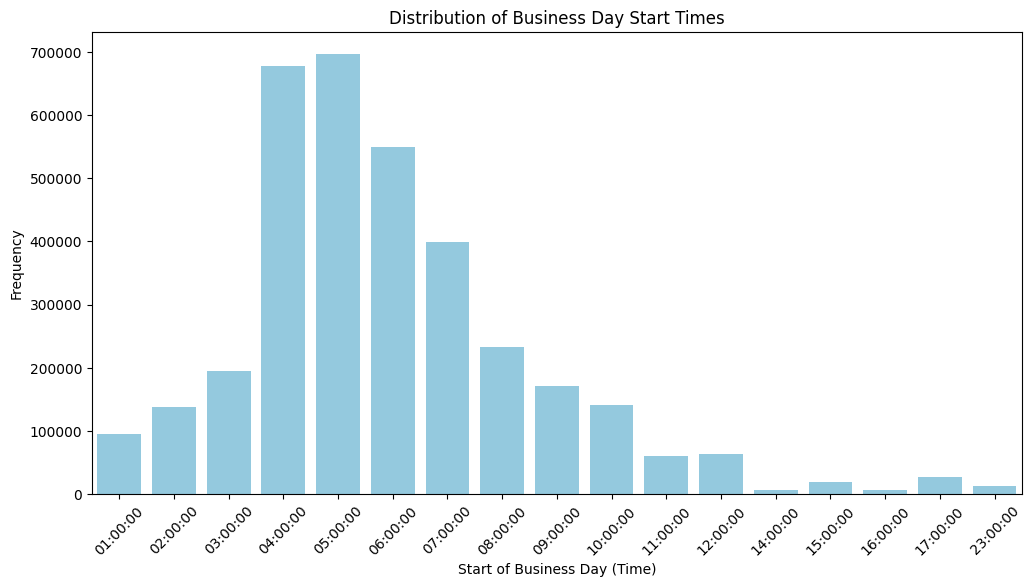

In [9]:
time_counts = df["start_of_day_offset"].value_counts().sort_index()

# Convert times to a DataFrame for plotting
time_counts_df = pd.DataFrame({"time": time_counts.index, "count": time_counts.values})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=time_counts_df, x="time", y="count", color="skyblue")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Start of Business Day (Time)")
plt.ylabel("Frequency")
plt.title("Distribution of Business Day Start Times")
plt.show()

In [13]:
all_hours

,start_of_day_offset
0,00:00:00
1,00:00:00
2,00:00:00
3,00:00:00
4,00:00:00
5,00:00:00
6,00:00:00
7,00:00:00
8,00:00:00
9,00:00:00


### Bills for each time of day Box plots (all venues)

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\237946495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['start_of_day_offset'] = filt_df['start_of_day_offset'].apply(lambda t: t.hour)
C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\237946495.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 400.0)

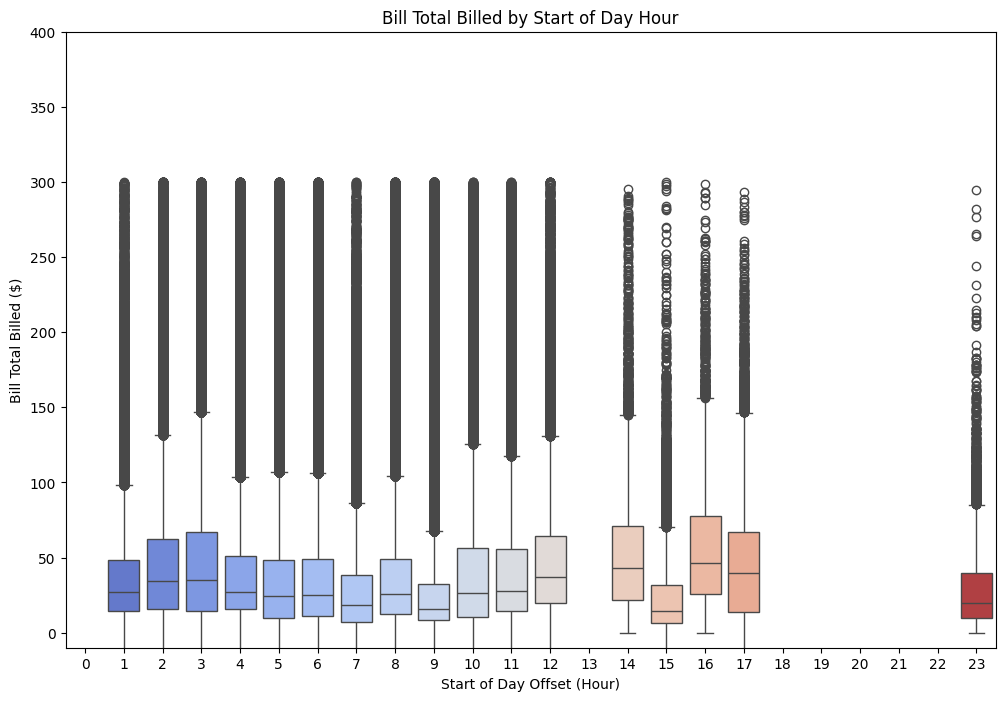

In [17]:
filt_df = df[df['bill_total_billed'] <= 300]
filt_df['start_of_day_offset'] = filt_df['start_of_day_offset'].apply(lambda t: t.hour)

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, filt_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bill Total Billed by Start of Day Hour')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10, 400)

### Bills of each time of day for each venue type Box plots

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\637500984.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 446.25)

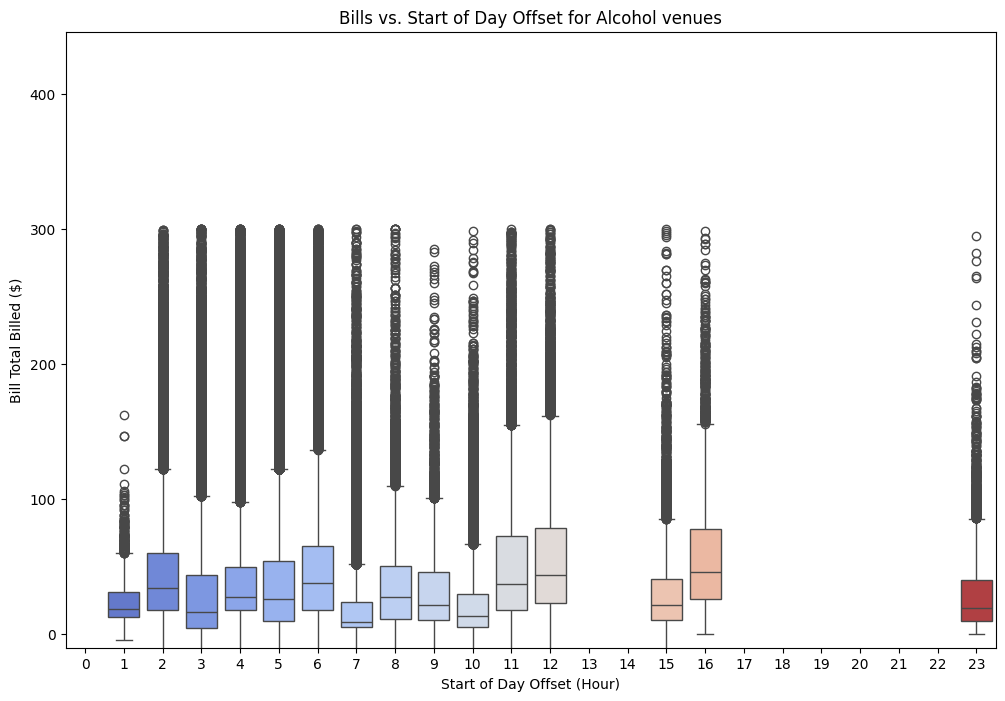

In [18]:
alc = ['BAR', 'BREWERY', 'SPORTS_CLUB']
alc_df = filt_df[filt_df['concept'].isin(alc)]

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, alc_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset for Alcohol venues')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\2890627610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 320.9325)

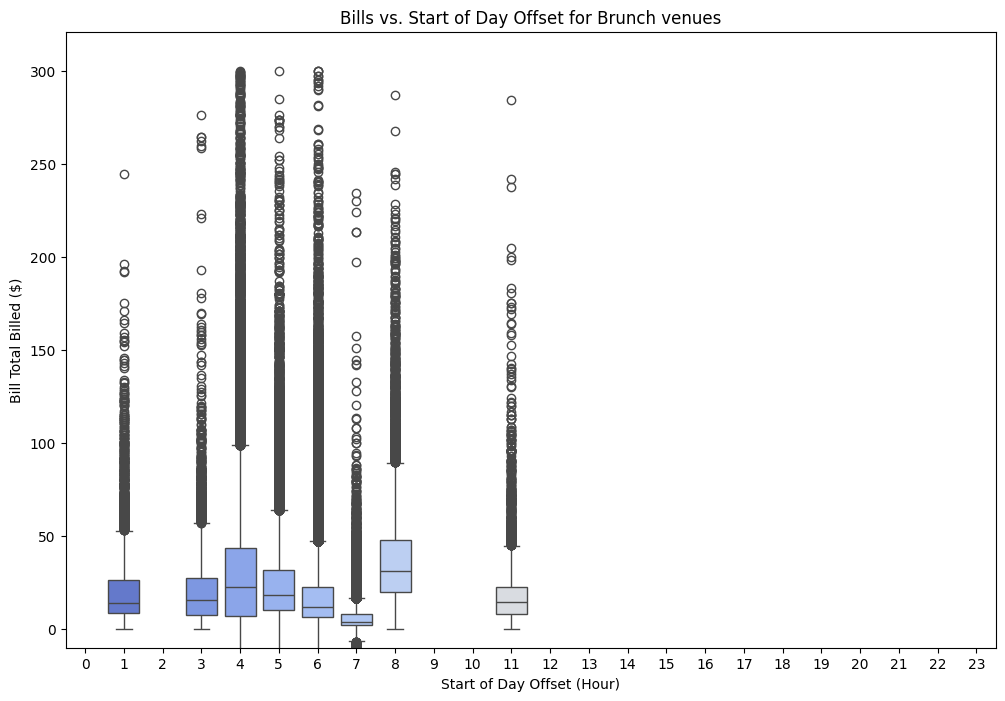

In [19]:
brunch = ['BAKERY', 'CAFE']
br_df = filt_df[filt_df['concept'].isin(brunch)]

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, br_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset for Brunch venues')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\3880744915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 322.5195)

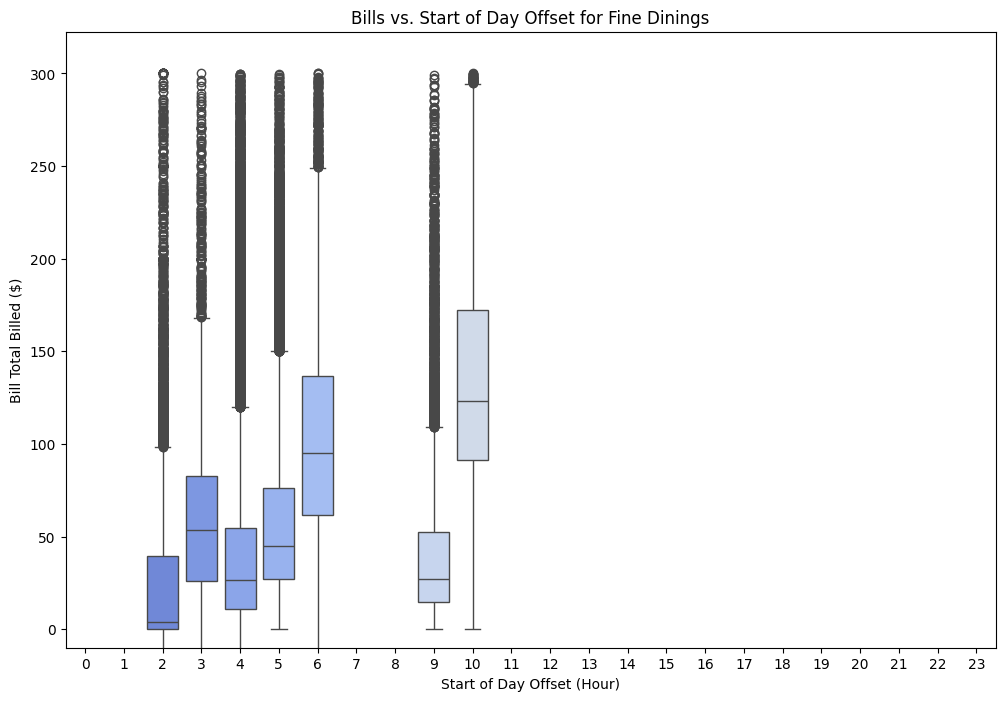

In [20]:
fine = ['FINE_DINING', 'HOTEL']
fine_df = filt_df[filt_df['concept'].isin(fine)]

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, fine_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset for Fine Dinings')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\146830152.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 143.679)

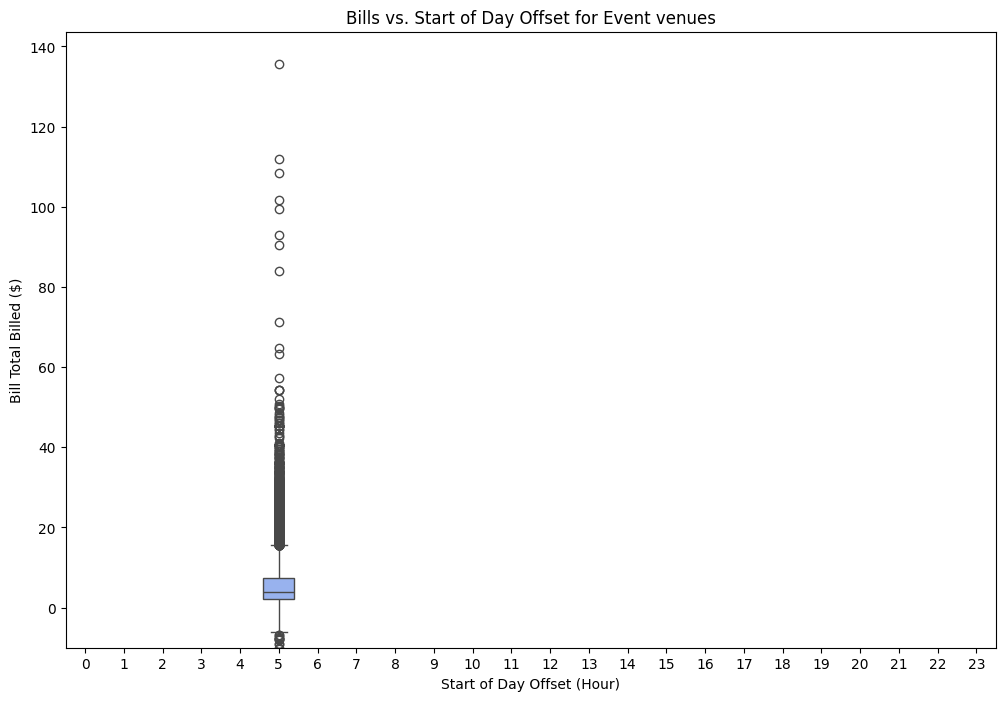

In [21]:
event = ['ENTERTAINMENT_COMPLEX', 'FOOD_TRUCK', 'POP_UP']
event_df = filt_df[filt_df['concept'].isin(event)]

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, event_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset for Event venues')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)

C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\3524913154.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 346.29)

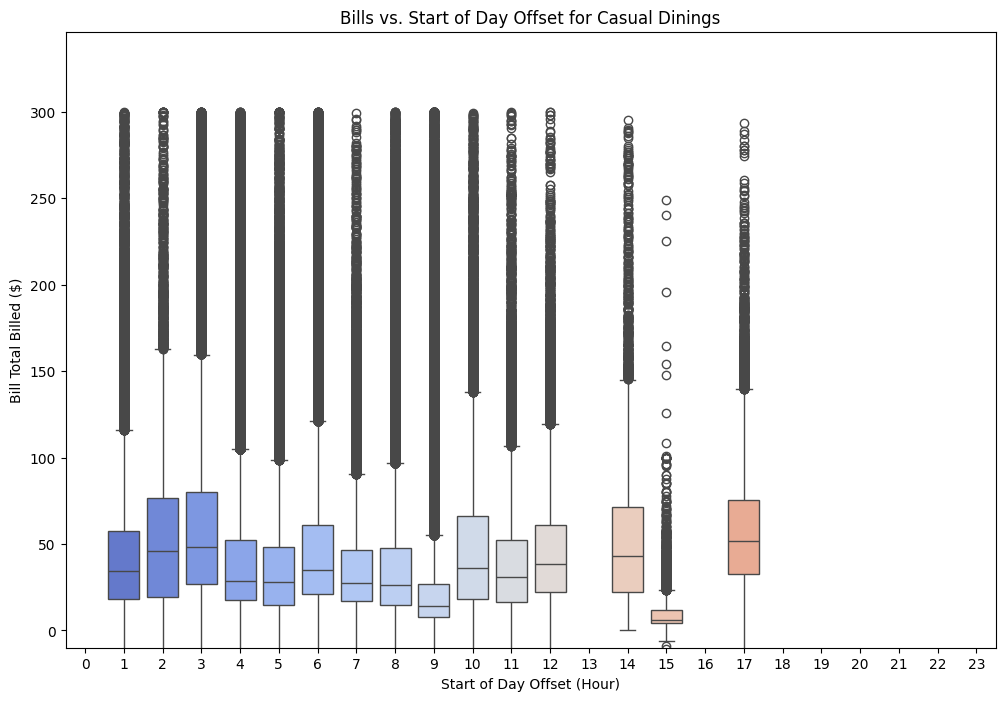

In [22]:
casual = ['FAMILY_DINING', 'FAST_CASUAL', 'FAST_FOOD']
casual_df = filt_df[filt_df['concept'].isin(casual)]

# include all hours even with no data
all_hours = pd.DataFrame({'start_of_day_offset': range(24)})
df_with_all_hours = pd.merge(all_hours, casual_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset for Casual Dinings')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)

In [39]:
blank_df['concept']

Series([], Name: concept, dtype: object)

In [41]:
print(filt_df['concept'].value_counts(dropna=False))


concept
FAMILY_DINING            1028890
BAR                       870355
CAFE                      444071
nan                       397216
FAST_CASUAL               291217
BREWERY                   173438
FINE_DINING               167616
ENTERTAINMENT_COMPLEX      52501
HOTEL                      26333
FAST_FOOD                  13076
BAKERY                      7835
Name: count, dtype: int64


C:\Users\soojs\AppData\Local\Temp\ipykernel_18992\4009293807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')


(-10.0, 372.9245)

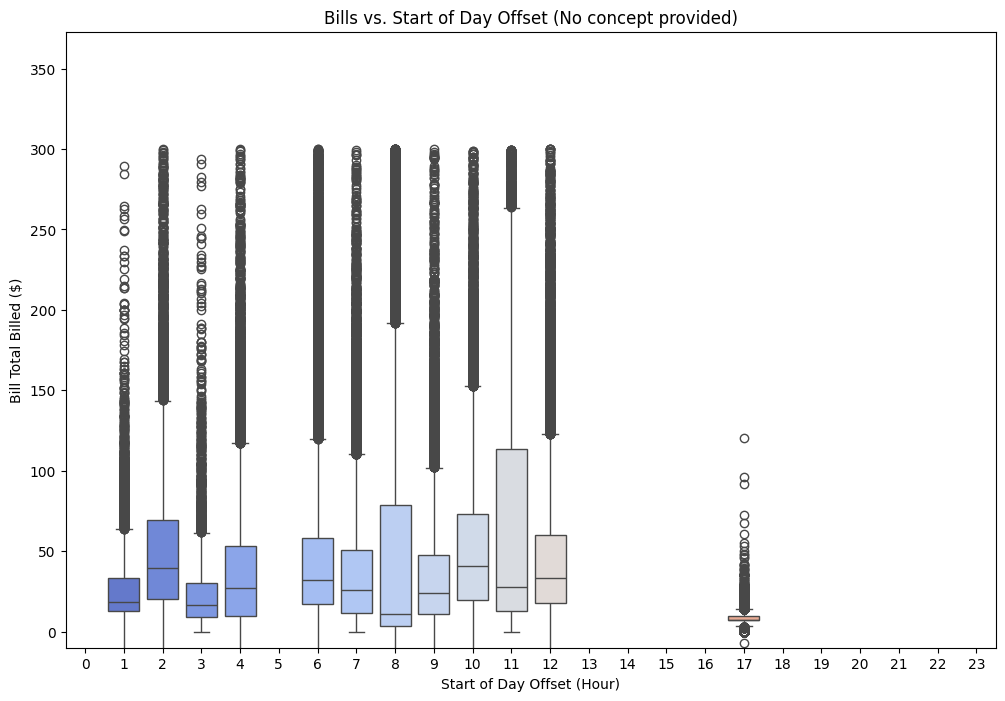

In [45]:
blank_df = filt_df[(filt_df['concept'] == 'nan') | (filt_df['concept'].str.strip() == '')]

df_with_all_hours = pd.merge(all_hours, blank_df, on='start_of_day_offset', how='left')

# Set plot size and style
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='start_of_day_offset', y='bill_total_billed', data=df_with_all_hours, palette='coolwarm')

# Labels and title
plt.title('Bills vs. Start of Day Offset (No concept provided)')
plt.xlabel('Start of Day Offset (Hour)')
plt.ylabel('Bill Total Billed ($)')
plt.ylim(-10)